In [23]:
#coding https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/ with numpy, checking with iterative version at  https://github.com/animesh/ann/blob/master/ann/Program.cs with following output
#Iteration = 1   Error = 0.298371108760003       Outputs = 0.751365069552316     0.772928465321463
#Iteration = 2   Error = 0.291027773693599       Outputs = 0.742088111190782     0.775284968294459  ...
inp=[0.05,0.10]
inpw=[[0.15,0.20],[0.25,0.3]]
hidw=[[0.4,0.45],[0.5,0.55]]
outputr=[0.01,0.99]
bias=[0.35,0.6]
lr=0.5
import numpy as np
x=np.asarray(inp)
y=np.asarray(outputr)
#b=np.asarray(bias) # precision issues with unrounding? so using bias array as is ...
w1=np.asarray(inpw)
w2=np.asarray(hidw)
print(x,y,bias,w1,w2)
h=1/(1+np.exp(-(x.dot(w1.T)+bias[0])))
y_pred=1/(1+np.exp(-(h.dot(w2.T)+bias[1])))
print(0.5*np.square(y_pred - y).sum())
#0.298371108760003
w3=w2-lr*np.outer((y_pred - y)*(1-y_pred)*y_pred,h)
print(w3)
#  Weight: 0.35891647971788465
#  Weight: 0.4086661860762334
#  Bias: 0.6
#  Weight: 0.5113012702387375
#  Weight: 0.5613701211079891
#inpw0.149780716132763,delin0.0363503063931447,hidden0.593269992107187,input0.05,diff0.000219283867237173
#inpw0.24975114363237,delin0.0413703226487447,hidden0.596884378259767,input0.05,diff0.00024885636763043
#inpw0.199561432265526,delin0.0363503063931447,hidden0.593269992107187,input0.1,diff0.000438567734474347
#inpw0.299502287264739,delin0.0413703226487447,hidden0.596884378259767,input0.1,diff0.00049771273526086
w4=w1-lr*np.outer(w2.T.dot((y_pred - y)*(1-y_pred)*y_pred)*h*(1-h),x)
print(w4)
#  Weight: 0.1497807161327628
#  Weibght: 0.19956143226552567
#  Bias: 0.35
#  Weight: 0.24975114363236958
#  Weight: 0.29950228726473915
h1=1/(1+np.exp(-(x.dot(w4.T)+bias[0])))
y_pred_h1=1/(1+np.exp(-(h1.dot(w3.T)+bias[1])))
print(0.5*np.square(y_pred_h1 - y).sum())
#0.291027773693599

[0.05 0.1 ] [0.01 0.99] [0.35, 0.6] [[0.15 0.2 ]
 [0.25 0.3 ]] [[0.4  0.45]
 [0.5  0.55]]
0.2983711087600027
[[0.35891648 0.40866619]
 [0.51130127 0.56137012]]
[[0.14978072 0.19956143]
 [0.24975114 0.29950229]]
0.29102777369359933


In [ ]:
https://twitter.com/yaroslavvb/status/1477298022606278656?s=20
I'm doing an opinion piece of how the field is held back by optimizer-unfriendly APIs so collecting list of specific examples (so far -- KFAC, shampoo, admm, PSGD, Hessian-free)
https://twitter.com/cHHillee/status/1477414153891446785?s=20
If you really don't want this behavior, set `torch.use_deterministic_algorithms` (https://pytorch.org/docs/stable/generated/torch.use_deterministic_algorithms.html), at the cost of some performance (varies from small to a lot depending on the situation).
https://github.com/openai/CLIP/issues/13
https://www.twosigma.com/articles/a-workaround-for-non-determinism-in-tensorflow/



In [43]:
import tensorflow as tf
import numpy as np
N = 100
S = (1, 100000)
np.random.seed(1)
r = np.random.normal(0, 100, S).astype(np.float32)
x = tf.placeholder(tf.float32, S)
examples = {
    'reduce_sum': tf.reduce_sum(x),
    'reduce_sum_det': tf.matmul(x, tf.ones_like(x), transpose_b=True),
}
s = tf.Session()
results = {
    key: np.array([s.run(val, feed_dict={x:r}) for j in range(N)])
    for key, val in examples.items()
}
for key, val in results.items():
    print('%20s mean = %.8f max-min = %.6f' % (key, val.mean(), val.max() - val.min()))

AttributeError: ignored

In [37]:
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
tf.compat.v1.disable_eager_execution()
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print(tf.config.list_physical_devices('GPU'))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
X = np.asarray(inp, np.float32)
Y = np.asarray(outputr, np.float32)
#tf.reset_default_graph()                                   # “Wipe the blackboard”, construct a new graph
a_  = tf.Variable(0.0, name='a_var')                       # Variables, with starting values, will be optimized later
b_  = tf.Variable(139.0, name='b_var')                     # we name them so that they look nicer in the graph
x_  = tf.constant(X[0], name='x_const')                       # Constants, these are fixed tensors holding the data values and cannot be changed by the optimization
y_  = tf.constant(X[1], name='y_const')
ax_ = a_* x_
abx_ = ax_ + b_
r_ = abx_ - y_
s_ = tf.square(r_)
mse_ = tf.reduce_mean(s_)
grad_mse_s_ = tf.gradients(mse_, [s_])                      # gradient of mse_ w.r.t s_
grad_s_r_ = tf.gradients(s_, [r_])                          # gradient of s_ w.r.t r_
grad_r_abx_ = tf.gradients(r_, [abx_])                      # gradient of r_ w.r.t abx_
grad_abx_b_ = tf.gradients(abx_, [b_])                      # gradient of abx_ w.r.t b_
grad_abx_ax_ = tf.gradients(abx_, [ax_])                    # gradient of abx_ w.r.t ax_
grad_ax_a_ = tf.gradients(ax_, [a_])                        # gradient of ax_ w.r.t a_
grads_mse_a_b_ = tf.gradients(mse_, [a_,b_])                # gradient of mse_ w.r.t a_ and b_ (what we actually want)
#writer = tf.summary.FileWriter("linreg/", tf.get_default_graph())
#writer.close()
n_hidden = 2
#from tensorflow.keras import backend #or pip uninstall keras
#https://drscotthawley.github.io/devblog3/2019/02/08/My-1st-NN-Part-3-Multi-Layer-and-Backprop.html
model = Sequential([
    Dense(n_hidden, input_shape=(X.shape[0],), activation='relu'),
    Dense(Y.shape[0], activation='sigmoid')])
# choices for loss and optimization method
opt = Adam()   # We'll talk about optimizer choices later
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['binary_accuracy'])
# training iterations
maxiter=5000
model.fit(X,Y, epochs=maxiter, batch_size=(2,1))#Y.shape[0], verbose=0)
print("\nY_tilde = \n", model.predict(X) )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2791582983068730301
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6907946624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2206312871740609305
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:81:00.0, compute capability: 7.5"
]
Version:  2.4.1
Eager mode:  False
Eager mode:  False
GPU is available
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-01-04 11:11:32.188844: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-04 11:11:32.189841: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:81:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-04 11:11:32.189876: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.77GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2022-01-04 11:11:32.189933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-04 11:11:32.189961: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-01-04 11:11:32.189981: I tensorflow/stream_executo

ValueError: ignored

In [ ]:
#C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\Scripts
python "F:\GD\OneDrive\Dokumenter\GitHub\scripts\testGPU.py" gpu 10000

In [ ]:
pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8888  --NotebookApp.port_retries=0

In [ ]:
#https://colab.research.google.com/github/mle-infrastructure/mle-hyperopt/blob/main/examples/getting_started.ipynb#scrollTo=b1ff5d35-b29e-4386-b423-9c83ad1ae169
#!pip install mle-hyperopt

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

try:
    import mle_hyperopt
except:
    !pip install -q mle-hyperopt
    import mle_hyperopt

def fake_train(lrate, batch_size, arch):
    """Optimum: lrate=0.2, batch_size=4, arch='conv'."""
    f1 = ((lrate - 0.2) ** 2 + ((batch_size - 4)/4) ** 2
          + (0 if arch == "conv" else 0.2))
    return f1

In [ ]:
from mle_hyperopt import GridSearch
# Instantiate grid search class
strategy = GridSearch(real={"lrate": {"begin": 0.1,
                                      "end": 0.5,
                                      "bins": 5}},
                      integer={"batch_size": {"begin": 1,
                                              "end": 5,
                                              "bins": 1}},
                      categorical={"arch": ["mlp", "cnn"]},
                      verbose=True)

           MLE-Hyperopt Gird Search Hyperspace 🚀                      
                                                                                
           🌻 Variable   Type          Search Range ↔                           
          ───────────────────────────────────────────────────────────           
           arch          categorical   ['mlp', 'cnn']                           
           lrate         real          Begin: 0.1, End: 0.5, Bins: 5            
           batch_size    integer       Begin: 1, End: 5, Bins: 1     

In [ ]:
# Ask the strategy for five configs to evaluate
configs = strategy.ask(batch_size=5)
configs

[{'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1},
 {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2},
 {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.30000000000000004},
 {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.4},
 {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.5}]

In [ ]:
# Simple ask - eval - tell API
values = [fake_train(**c) for c in configs]
strategy.tell(configs, values)

┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ 
┃ 📥 Total: 5   ┃ ID ┃ Obj. 📉 ┃ Configuration 🔖 - 01/04/2022 10:34:30       ┃ 
┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ 
│ Best Overall  │ 1  │ 0.762   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2 │ 
│ Best in Batch │ 1  │ 0.762   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2 │ 
└───────────────┴────┴─────────┴──────────────────────────────────────────────┘

In [ ]:
# Storing of results to .pkl
strategy.save("search_log.json")

# Reloading of results from .pkl
strategy.load("search_log.json")

[10:34:55] Stored 5 search iterations --> search_log.json.                    ]8;id=476338;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=578166;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#175\175]8;;\

[10:34:55] {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1} was previously      ]8;id=40468;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=796698;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#134\134]8;;\
           evaluated.

[10:34:55] {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2} was previously      ]8;id=108171;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=465115;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#134\134]8;;\
           evaluated.

[10:34:55] {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.30000000000000004} was ]8;id=421902;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=20230;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#134\134]8;;\
           previously evaluated.

[10:34:55] {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.4} was previously      ]8;id=526182;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=764223;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#134\134]8;;\
           evaluated.

[10:34:55] {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.5} was previously      ]8;id=902097;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=519926;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#134\134]8;;\
           evaluated.

[10:34:55] Reloaded 0 previous search iterations.                             ]8;id=568262;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=465568;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#197\197]8;;\

In [ ]:
from mle_hyperopt import GridSearch
strategy = GridSearch(real={"lrate": {"begin": 0.1,
                                      "end": 0.5,
                                      "bins": 5}},
                      integer={"batch_size": {"begin": 1,
                                              "end": 5,
                                              "bins": 1}},
                      categorical={"arch": ["mlp", "cnn"]},
                      reload_path="search_log.json")

[10:35:36] Reloaded 5 previous search iterations.                             ]8;id=955305;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py\strategy.py]8;;\:]8;id=465814;file:///home/animeshs/miniconda3/envs/colab/lib/python3.9/site-packages/mle_hyperopt/strategy.py#197\197]8;;\

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Best Objective Value'}, xlabel='# Config Evaluations', ylabel='Objective'>)

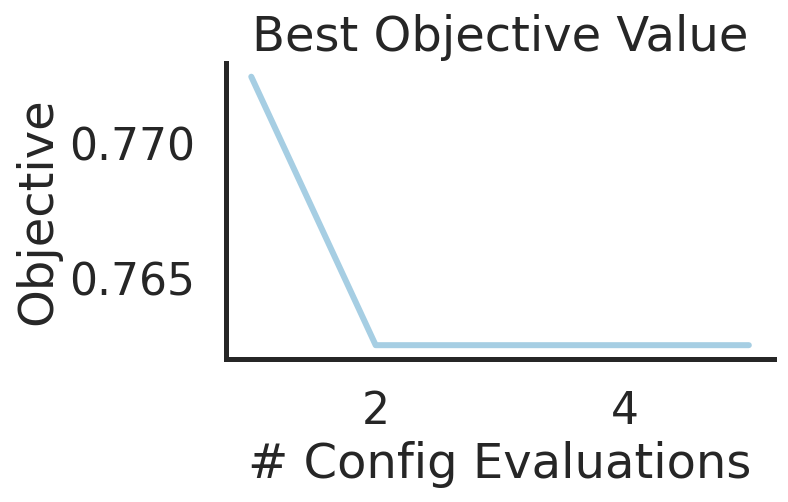

In [ ]:
# Plot timeseries of best performing score over search iterations
strategy.plot_best()  

In [ ]:
# Print out ranking of best performers
strategy.print_ranking(top_k=4)

┏━━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓          
          ┃ 🥇 Rank ┃ ID ┃ Obj. 📉 ┃ Configuration 🔖                             ┃          
          ┡━━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩          
          │ 1       │ 1  │ 0.762   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2 │          
          │ 2       │ 0  │ 0.772   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1 │          
          │ 3       │ 2  │ 0.772   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.3 │          
          │ 4       │ 3  │ 0.802   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.4 │          
          └─────────┴────┴─────────┴──────────────────────────────────────────────┘

In [ ]:
strategy = GridSearch(real={"lrate": {"begin": 0.1,
                                      "end": 0.5,
                                      "bins": 5}},
                      integer={"batch_size": {"begin": 1,
                                              "end": 5,
                                              "bins": 1}},
                      categorical={"arch": ["mlp", "cnn"]},
                      fixed_params={"momentum": 0.9})

strategy.ask(2, store=True)

([{'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1, 'momentum': 0.9},
  {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2, 'momentum': 0.9}],
 ['eval_0.yaml', 'eval_1.yaml'])

In [ ]:
from mle_hyperopt import RandomSearch

strategy = RandomSearch(real={"lrate": {"begin": 0.1,
                                        "end": 0.5,
                                        "prior": "uniform"}},
                        integer={"batch_size": {"begin": 1,
                                                "end": 5,
                                                "prior": "log-uniform"}},
                        categorical={"arch": ["mlp", "cnn"]},
                        search_config={"refine_after": 5,
                                       "refine_top_k": 2},
                        seed_id=42,
                        verbose=True)

configs = strategy.ask(5)
values = [fake_train(**c) for c in configs]
strategy.tell(configs, values)

              MLE-Hyperopt Random Search Hyperspace 🚀                    
                                                                                
        🌻 Variable   Type          Search Range ↔                              
       ──────────────────────────────────────────────────────────────────       
        arch          categorical   ['mlp', 'cnn']                              
        lrate         real          Begin: 0.1, End: 0.5, Prior: uniform        
        batch_size    integer       Begin: 1, End: 5, Prior: log-uniform 

┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ 📥 Total: 5   ┃ ID ┃ Obj. 📉 ┃ Configuration 🔖 - 01/04/2022 10:38:21        ┃
┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Best Overall  │ 4  │ 0.268   │ 'arch': 'cnn', 'lrate': 0.123, 'batch_size':  │
│               │    │         │ 3                                             │
│ Best in Batch │ 4  │ 0.268   │ 'arch': 'cnn', 'lrate': 0.123, 'batch_size':  │
│               │    │         │ 3                                             │
└───────────────┴────┴─────────┴───────────────────────────────────────────────┘

      MLE-Hyperopt Random Search - 5 Evals - Top 2 - Refined Hyperspace 🚀      
                                                                                
  🌻 Variable   Type          Search Range ↔                                    
 ────────────────────────────────────────────────────────────────────────────── 
  arch          categorical   ['mlp', 'cnn']                                    
  lrate         real          Begin: 0.123, End: 0.34044600469728353, Prior:    
                              uniform                                           
  batch_size    integer       Begin: 3, End: 3, Prior: log-uniform             

In [ ]:
from mle_hyperopt import SMBOSearch

strategy = SMBOSearch(real={"lrate": {"begin": 0.1,
                                      "end": 0.5,
                                      "prior": "uniform"}},
                      integer={"batch_size": {"begin": 1,
                                              "end": 5,
                                              "prior": "uniform"}},
                      search_config={"base_estimator": "GP",
                                     "acq_function": "gp_hedge",
                                     "n_initial_points": 5},
                      fixed_params={"arch": "cnn"})

configs = strategy.ask(5)
values = [fake_train(**c) for c in configs]
strategy.tell(configs, values)

In [ ]:
from mle_hyperopt import hyperopt

@hyperopt(strategy_type="Grid",
          num_search_iters=400,
          real={"x": {"begin": -0.5, "end": 0.5, "bins": 20},
                "y": {"begin": -0.5, "end": 0.5, "bins": 20}})
def circle_objective(config):
    distance = abs((config["x"] ** 2 + config["y"] ** 2))
    return distance

strategy = circle_objective()
len(strategy)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/OneDrive/Dokumenter/GitHub/notebooks/Supplementary Table 2 for working purpose.xlsxtrp.id.wekG3.csv.arff.csv')
data.head(2)
data.shape

(46, 3957)

In [ ]:
df=pd.DataFrame(data)
X = df.iloc[:, :3955]
y = df.iloc[:, 3956]

In [ ]:
#https://automl.github.io/auto-sklearn/master/examples/20_basic/example_multilabel_classification.html#sphx-glr-examples-20-basic-example-multilabel-classification-py
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 4.5 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 22.3 MB 40 kB/s 
     |████████████████████████████████| 722 kB 55.9 MB/s 
     |████████████████████████████████| 4.2 MB 34.8 MB/s 
     |████████████████████████████████| 4.0 MB 41.0 MB/s 
     |████████████████████████████████| 208 kB 42.6 MB/s 
     |████████████████████████████████| 973 kB 57.3 MB/s 
     |████████████████████████████████| 125 kB 59.3 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.0-py3-none-any.whl size=6585992 sha256=64d840fe46e205751cd7ccaaf92f9c8f003f8d08bc60800a247cb7a5cb3449ca
  Stored in directory: /root/.cache/pip/wheels/c5/56/cc/e33d4a8cb4ffeb040d59ea08c4715d20806945dc80d3c25384
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=e2adc68bdc77285213494fe63228f45c770ec7e602a1b0d9ec6f2a5684910c9e


In [ ]:
!pip install scipy==1.7.0

     |████████████████████████████████| 28.5 MB 32 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.utils.multiclass import type_of_target
import autosklearn.classification

In [ ]:
#X, y = sklearn.datasets.fetch_openml(data_id=40594, return_X_y=True, as_frame=False)

In [ ]:
#y[y == 'TRUE'] = 1
#y[y == 'FALSE'] = 0
#y = y.astype(np.int)

# Using type of target is a good way to make sure your data
# is properly formatted
print(f"type_of_target={type_of_target(y)}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

type_of_target=multiclass


In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60,
    per_run_time_limit=30,
    # Bellow two flags are provided to speed up calculations
    # Not recommended for a real implementation
    initial_configurations_via_metalearning=0,
    smac_scenario_args={'runcount_limit': 1},
)
automl.fit(X_train, y_train, dataset_name='myeloma')

[WARNING] [2021-10-22 08:44:51,272:Client-AutoML(1):myeloma] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(initial_configurations_via_metalearning=0,
                      per_run_time_limit=30,
                      smac_scenario_args={'runcount_limit': 1},
                      time_left_for_this_task=60)

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight           type  cost  duration
model_id                                                      
2            1              1.0  random_forest  0.25  2.082478


In [ ]:
print(automl.show_models())

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: myeloma
  Metric: accuracy
  Best validation score: 0.750000
  Number of target algorithm runs: 1
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.9166666666666666


In [ ]:
#https://github.com/automl/Auto-PyTorch
from autoPyTorch import AutoNetClassification

# data and metric imports
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)

# running Auto-PyTorch
autoPyTorch = AutoNetClassification("tiny_cs",  # config preset
                                    log_level='info',
                                    max_runtime=300,
                                    min_budget=30,
                                    max_budget=90)

autoPyTorch.fit(X_train, y_train, validation_split=0.3)
y_pred = autoPyTorch.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_pred))

In [ ]:
# https://autokeras.com/tutorial/customized/ Build the AutoModel
input_node = ak.Input()
output_node = SingleDenseLayerBlock()(input_node)
output_node = ak.RegressionHead()(output_node)
auto_model = ak.AutoModel(input_node, output_node, overwrite=True, max_trials=1)
# Prepare Data
num_instances = 100
x_train = np.random.rand(num_instances, 20).astype(np.float32)
y_train = np.random.rand(num_instances, 1).astype(np.float32)
x_test = np.random.rand(num_instances, 20).astype(np.float32)
y_test = np.random.rand(num_instances, 1).astype(np.float32)
# Train the model
auto_model.fit(x_train, y_train, epochs=1)
print(auto_model.evaluate(x_test, y_test))

In [ ]:
#https://github.com/awslabs/autogluon
!pip install autogluon

     |████████████████████████████████| 352 kB 2.9 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 273 kB 61.4 MB/s 
     |████████████████████████████████| 131 kB 64.5 MB/s 
     |████████████████████████████████| 206 kB 49.1 MB/s 
     |████████████████████████████████| 27.4 MB 95 kB/s 
     |████████████████████████████████| 4.2 MB 10.5 MB/s 
     |████████████████████████████████| 119 kB 52.5 MB/s 
     |████████████████████████████████| 1.3 MB 54.4 MB/s 
     |████████████████████████████████| 3.0 MB 35.2 MB/s 
     |████████████████████████████████| 296 kB 44.8 MB/s 
     |████████████████████████████████| 67.3 MB 7.4 kB/s 
     |████████████████████████████████| 2.0 MB 19.0 MB/s 
     |████████████████████████████████| 166.7 MB 16 kB/s 
     |████████████████████████████████| 186 kB 65.9 MB/s 
     |████████████████████████████████| 157 kB 43.0 MB/s 
     |██████████████

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
predictor = TabularPredictor(label='Group').fit(df, time_limit=120)  # Fit models for 120s
leaderboard = predictor.leaderboard(df)

No path specified. Models will be saved in: "AutogluonModels/ag-20211021_134502/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211021_134502/"
AutoGluon Version:  0.3.1
Train Data Rows:    46
Train Data Columns: 3956
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['G', 'L', 'M']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12628.4 MB
	Train Data (Original)  Memory Usage: 1.46 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manuall

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMLarge    0.978261        0.9        0.032357       0.026543   7.061856                 0.032357                0.026543           7.061856            1       True         12
1               XGBoost    0.978261        0.9        0.070585       0.022309   3.107075                 0.070585                0.022309           3.107075            1       True         11
2        KNeighborsDist    0.978261        0.9        0.108402       0.108595   1.261775                 0.108402                0.108595           1.261775            1       True          2
3      RandomForestEntr    0.978261        0.9        0.116371       0.103962   3.274807                 0.116371                0.103962           3.274807            1       True          7
4        ExtraTreesEntr    0.978261     

In [ ]:
#https://mlbox.readthedocs.io/en/latest/introduction.html
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
paths = ["<file_1>.csv", "<file_2>.csv", ..., "<file_n>.csv"] #to modify
target_name = "<my_target>" #to modify
data = Reader(sep=",").train_test_split(paths, target_name)  #reading
data = Drift_thresholder().fit_transform(data)  #deleting non-stable variables
Optimiser().evaluate(None, data)
space = {

        'ne__numerical_strategy' : {"space" : [0, 'mean']},

        'ce__strategy' : {"space" : ["label_encoding", "random_projection", "entity_embedding"]},

        'fs__strategy' : {"space" : ["variance", "rf_feature_importance"]},
        'fs__threshold': {"search" : "choice", "space" : [0.1, 0.2, 0.3]},

        'est__strategy' : {"space" : ["LightGBM"]},
        'est__max_depth' : {"search" : "choice", "space" : [5,6]},
        'est__subsample' : {"search" : "uniform", "space" : [0.6,0.9]}

        }

best = opt.optimise(space, data, max_evals = 5)
Predictor().fit_predict(best, data)

In [ ]:
#http://epistasislab.github.io/tpot/examples/
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9826086956521738
exported_pipeline = make_pipeline(
    Normalizer(norm="l2"),
    KNeighborsClassifier(n_neighbors=5, p=2, weights="distance")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [ ]:
#https://github.com/pycaret/pycaret/blob/master/examples/Fetal%20State%20Classification%20Tutorial%20-FSC101.ipynb
from pycaret.classification import *
clf=setup(data=df,target='NSP')
compare_models()

In [ ]:
xgboost_classifier=create_model('xgboost')
print(xgboost_classifier)
tuned_xgboost_classifier=tune_model(xgboost_classifier)
plot_model(tuned_xgboost_classifier,plot='class_report')
plot_model(tuned_xgboost_classifier,plot='confusion_matrix')
save_model(tuned_xgboost_classifier,"XGBOOST CLASSIFIER")
saved_model=load_model('XGBOOST CLASSIFIER')

In [ ]:
# mljar-supervised package
from supervised.automl import AutoML

# load the data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(digits.data), digits.target, stratify=digits.target, test_size=0.25,
    random_state=123
)

# train models with AutoML
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

# compute the accuracy on test data
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

In [ ]:
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#code-examples
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
aml.leader

In [ ]:
#https://github.com/ludwig-ai/ludwig
from ludwig.api import LudwigModel

# train a model
config = {...}
model = LudwigModel(config)
train_stats = model.train(training_data)

# or load a model
model = LudwigModel.load(model_path)

# obtain predictions
predictions = model.predict(test_data)


In [ ]:
!python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([69, 69])))"

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8888   --NotebookApp.port_retries=0

In [ ]:
tf.test.is_gpu_available()

In [ ]:
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
with tf.device('/device:CPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
#print(sess.run(c))

In [ ]:
tf.debugging.experimental.enable_dump_debug_info("logs", tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)

In [ ]:
!pwd

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
values=le.transform(y)
print(values)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(le.transform(y).reshape(-1,1))
enc.categories_
#print(enc.transform(le.transform(y).reshape(-1,1)))

In [ ]:
#print(np.array(tf.one_hot(le.transform(y), depth=3)))
#vocabulary_feature_column =  tf.feature_column.categorical_column_with_vocabulary_list(key=["P", "V", "K"],vocabulary_list=["P", "V", "K"])
import numpy as np
n_values = np.max(values) + 1
Y=np.eye(n_values)[values]

In [ ]:
#Y=pd.DataFrame(np.array(tf.one_hot(le.transform(y), depth=3)))
Y=pd.DataFrame(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X_train.to_csv("X_train.csv", index = False, header = None)
X_test.to_csv("X_test.csv", index = False, header = None)
Y_train.to_csv("Y_train.csv", index = False, header = None)
Y_test.to_csv("Y_test.csv", index = False, header = None)
Y_test.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape[1],Y_train.shape[1] 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 9, activation = 'relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = Y_train.shape[1] , activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, Y_train, batch_size = X_train.shape[1],epochs = 100)

In [ ]:
Y_pred = classifier.predict(X_test)
#Y_pred
y_pred=(Y_pred.argmax(1)[:,None] == np.arange(Y_pred.shape[1])).astype(int)
y_pred

In [ ]:
y_test=Y_test.values
y_test=(y_test.argmax(1)[:,None] == np.arange(y_test.shape[1])).astype(int)
y_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

In [ ]:
# Install TensorFlow Dececision Forests.
!pip install tensorflow_decision_forests
# Use wurlitzer to capture training logs.
!pip install wurlitzer

In [ ]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import collections
try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes
from IPython.core.magic import register_line_magic
from IPython.display import Javascript
@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [ ]:
!ls /content/drive/My*Drive/notebooks/*.csv

In [ ]:
#from file icon, right click => https://www.roelpeters.be/running-an-r-kernel-in-google-colab/ 
#dataset_df = data
dataset_df = pd.read_csv("/content/drive/MyDrive/Supplementary Table 2 for working purpose.xlsxgene.NARM3CON.csv")
#dataset_df = dataset_df.drop('Unnamed: 0', 1)
print(dataset_df.head(3))

In [ ]:
#dataset_df = pd.read_csv("/content/drive/My Drive/Table.csv")
dataset_df = pd.read_csv('/content/drive/MyDrive/notebooks/Supplementary Table 2 for working purpose.xlsxid.csv')
print(dataset_df.head(3))

In [ ]:
classes = dataset_df["Group"].unique().tolist()
#classes = dataset_df["T: Class"].unique().tolist()
print(f"Label classes: {classes}")

In [ ]:
#dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Mayo Score")
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Group")
#dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="T: Class")
model = tfdf.keras.RandomForestModel(compute_oob_variable_importances=True,# growing_strategy="BEST_FIRST_GLOBAL",
      num_trees=500,
#    max_depth=8,
#    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
#hyperparameter_template="benchmark_rank1",
)
model.compile(metrics=["accuracy"])
with sys_pipes():
  model.fit(x=dataset_tf)

In [ ]:
%set_cell_height 300
model.summary()

In [ ]:
evaluation = model.evaluate(dataset_tf, return_dict=True)
print()
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=1, max_depth=100)

In [ ]:
inspector = model.make_inspector()
#?inspector.model_type

In [ ]:
[field for field in dir(inspector) if not field.startswith("_")]

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
def select_subject(subID):
    df_filtered= dataset_df[subID]
    ax = df_filtered.apply(np.sum).hist(color="orange")
subject = dataset_df.columns
interact(select_subject, subID=subject)

In [ ]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

In [ ]:
inspector.evaluation()

In [ ]:
for importance in inspector.variable_importances().keys():
  print("\t", importance)

In [ ]:
inspector.variable_importances()["NUM_NODES"]

In [ ]:
inspector.variable_importances()["SUM_SCORE"]

In [ ]:
inspector.variable_importances()["MEAN_DECREASE_IN_ACCURACY"]

In [ ]:
inspector.extract_tree(tree_idx=0)

In [ ]:
# number_of_use[F] will be the number of node using feature F in its condition.
number_of_use = collections.defaultdict(lambda: 0)

# Iterate over all the nodes in a Depth First Pre-order traversals.
for node_iter in inspector.iterate_on_nodes():

  if not isinstance(node_iter.node, tfdf.py_tree.node.NonLeafNode):
    # Skip the leaf nodes
    continue

  # Iterate over all the features used in the condition.
  # By default, models are "oblique" i.e. each node tests a single feature.
  for feature in node_iter.node.condition.features():
    number_of_use[feature] += 1

print("Number of condition nodes per features:")
for feature, count in number_of_use.items():
  print("\t", feature.name, ":", count,"\n")

In [ ]:
%set_cell_height 150
model.make_inspector().training_logs()

In [ ]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
print(evaluation)

#print(f"MSE: {evaluation['mse']}")
#print(f"RMSE: {math.sqrt(evaluation['mse'])}")

https://towardsdatascience.com/seeing-numbers-bayesian-optimisation-of-a-lightgbm-model-3642228127b3

In [ ]:
nfold      = 5
df=dataset_df
df['fold'] = pd.util.hash_pandas_object(df) % nfold
print(df['fold'].sum())

In [ ]:

def cross_val(eta=0.1,num_leaves=8,bag_frac=0.8,bag_freq=5,feat_frac=0.8):
    
    '''
    A function to return cross-validated LightGBM model accuracy
    
    Inputs
      eta: float, learning rate for model
      num_leaves: int, maximum number of leaves in tree
      bag_frac: float, random bagging fraction
      bag_freq: int, frequency of bagging
      feat_frac: float, feature fraction
    
    Outputs
      float, model accuracy from best iteration of cross-validated model
    '''
    
    # set the model parameters
    parameters = {
        'objective': 'multiclass',
        'metric': 'multi_error',
        'num_class':10,
        'learning_rate': eta,
        'num_leaves': int(num_leaves), # need to set this as int since optimisation feeds in float
        'bagging_fraction': bag_frac,
        'bagging_freq': int(bag_freq), # need to set this as int since optimisation feeds in float
        'feature_fraction': feat_frac,
        'force_col_wise':True, # suppress the warning
        'verbosity':-1
        }
    
       
    model = lgb.cv(
        params = parameters,
        train_set = dtrain,
        num_boost_round = 500,
        early_stopping_rounds = 10,
        folds = (([idx for idx in folds.index if folds[idx] != j],
                  [idx for idx in folds.index if folds[idx] == j]) for j in range(int(folds.max()))), # custom generator
        shuffle = False, # false as we're using our own folds
        verbose_eval = -1
        )
        
    
    # return accuracy rather than error
    # as the optimiser seeks to maximise rather than minimise
    return 1. - model['multi_error-mean'][-1]

In [ ]:
space = {
    'eta':(0.025,0.15),
    'num_leaves':(2,16),
    'bag_frac':(0.5,0.8),
    'bag_freq':(1,5),
    'feat_frac':(0.5,0.8)
    }


# set up the optimiser
optimiser = BayesianOptimization(
    f = cross_val,
    pbounds = space,
    verbose = 2,
    random_state = 0)

In [ ]:
cluster = KMeans(n_clusters=10,random_state=0)

# empty dict to hold results
d = {}

# loop through folds
for fold in folds.unique():
    
    # fit cluster on in-fold data
    cluster.fit(df_pca[folds!=fold])
    
    # get out-of-fold predictions
    d[fold] = cluster.predict(df_pca)*(1*(folds==fold))

# crunch to single column, ready for joining
clusters = pd.DataFrame(d).sum(axis=1).to_frame(name='cluster')